In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Produksi Mangga Jawa Barat.csv', sep=';')
dataset

id,provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_produksi,satuan,tahun
0    0,JAWA BARAT,3201,KABUPATEN BOGOR,294050,KUINT...                              
1    1,JAWA BARAT,3202,KABUPATEN SUKABUMI,735710,KU...                              
2    2,JAWA BARAT,3203,KABUPATEN CIANJUR,942580,KUI...                              
3    3,JAWA BARAT,3204,KABUPATEN BANDUNG,428480,KUI...                              
4    4,JAWA BARAT,3205,KABUPATEN GARUT,1128400,KUIN...                              
..                                                 ...                              
157  157,JAWA BARAT,3275,KOTA BEKASI,81980,KUINTAL,...                              
158  158,JAWA BARAT,3276,KOTA DEPOK,30020,KUINTAL,2018                              
159  159,JAWA BARAT,3277,KOTA CIMAHI,1050,KUINTAL,2018                              
160  160,JAWA BARAT,3278,KOTA TASIKMALAYA,44780,KUI...                              
161  161,JAWA BARAT,3279,KOTA BANJAR,52370,KUINTAL,...                              

[162 rows x 1 columns]

In [3]:
dataset = pd.read_csv('Produksi Mangga Jawa Barat.csv', sep=',')
dataset.head()

id    provinsi  kode_kabupaten_kota nama_kabupaten_kota  jumlah_produksi  \
0   0  JAWA BARAT                 3201     KABUPATEN BOGOR           294050   
1   1  JAWA BARAT                 3202  KABUPATEN SUKABUMI           735710   
2   2  JAWA BARAT                 3203   KABUPATEN CIANJUR           942580   
3   3  JAWA BARAT                 3204   KABUPATEN BANDUNG           428480   
4   4  JAWA BARAT                 3205     KABUPATEN GARUT          1128400   

    satuan  tahun  
0  KUINTAL   2013  
1  KUINTAL   2013  
2  KUINTAL   2013  
3  KUINTAL   2013  
4  KUINTAL   2013

In [4]:
dataset = dataset[['tahun', 'jumlah_produksi']]
dataset = dataset.dropna()

dataset.head()

tahun  jumlah_produksi
0   2013           294050
1   2013           735710
2   2013           942580
3   2013           428480
4   2013          1128400

In [5]:
dataset_tahun = dataset.groupby('tahun').sum().reset_index()
dataset_tahun

tahun  jumlah_produksi
0   2013         32707010
1   2014         32148180
2   2015         31022550
3   2016         26010640
4   2017         32545720
5   2018         40454210

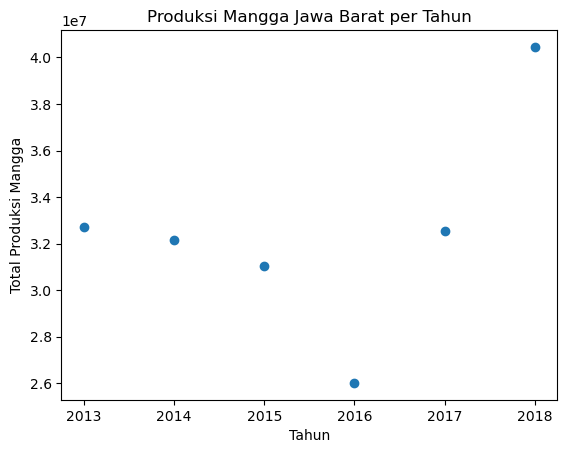

In [6]:
plt.scatter(dataset_tahun['tahun'], dataset_tahun['jumlah_produksi'])
plt.xlabel('Tahun')
plt.ylabel('Total Produksi Mangga')
plt.title('Produksi Mangga Jawa Barat per Tahun')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset_tahun[['tahun']]
y = dataset_tahun['jumlah_produksi']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 111586438761613.0
R2: -1428.2624491148133


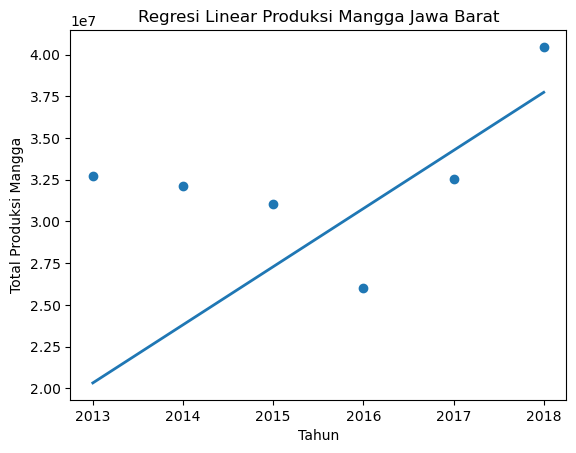

In [10]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), linewidth=2)
plt.xlabel('Tahun')
plt.ylabel('Total Produksi Mangga')
plt.title('Regresi Linear Produksi Mangga Jawa Barat')
plt.show()

In [11]:
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [3483006.]
Intercept: -6990973318.999999
